# Neural Network example using MNIST dataset
Rif.: Pro Deep Learning with Tensorflow (pag.146) migrated to tf2

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops
from tensorflow import initializers
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
def load_data():
	mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
	X_train = mnist.train.images
	Y_train = mnist.train.labels
	X_test = mnist.test.images
	Y_test = mnist.test.labels

	return X_train, Y_train, X_test, Y_test

In [3]:
def show_sample(X, Y, index):
	image = np.reshape(X[index], (28,28))
	labels = Y[index]
	print ("y = " + str(labels))
	print ("Number: " + str(np.argmax(labels)))
	plt.imshow(image)
	plt.show()

In [4]:
def create_placeholders(n_x, n_y):
	X = tf.placeholder(tf.float32, [None, n_x], name = "X")
	Y = tf.placeholder(tf.float32, [None, n_y], name = "Y")
	return X, Y

In [5]:
def create_parameters(n_x, n_y):
    initializer = tf.initializers.glorot_uniform()
    w1 = tf.Variable(initializer(shape=(n_x,n_y)), name="w1")
    b1 = tf.Variable(tf.zeros(shape=(n_y)), name="b1")
    return w1, b1

In [6]:
def forward_propagation(X, w, b):
  z1 = tf.add(tf.matmul(X,w), b)
  return z1

In [7]:
def cost_function(z1, Y):
	cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=z1, labels=Y))
	return cost

In [8]:
def model(X_train, Y_train, X_test, Y_test, learning_rate=0.01, num_epochs=100):

  ops.reset_default_graph()      # to be able to rerun the model without overwriting tf variables
  m, nx = X_train.shape
  ny = Y_train.shape[1]

  # create placeholders and parameters
  X, Y = create_placeholders(nx, ny)
  w1, b1 = create_parameters(nx, ny)

  # forward propagation
  z1 = forward_propagation(X, w1, b1)

  # cost function
  cost = cost_function(z1, Y)

  # optimizer
  optimizer = tf.train.AdamOptimizer(learning_rate, beta1=0.9, beta2=0.999).minimize(cost)

  # initialize variables
  init = tf.global_variables_initializer()

  cost_history = []
  accuracy_history = []

	# activate the tensorflow session
  with tf.Session() as sess:
    sess.run(init)
	
    for i in range(num_epochs):			
      _, J = sess.run([optimizer, cost], feed_dict={X:X_train, Y:Y_train})
      h = sess.run(z1, feed_dict={X:X_train})

      current_prediction = np.argmax(h, axis = 1)
      correct_prediction = np.argmax(Y_train, axis = 1)
      accuracy = np.mean(current_prediction == correct_prediction)
      accuracy_history.append(accuracy)
      cost_history.append(J)

      if (i+1) % 10 == 0:
        print("Epoch: %i, cost: %f, accuracy: %f" % ((i+1), J, accuracy))

    print("Final result: cost: %f, accuracy: %f" % (J, accuracy))

    # lets save the parameters in a variable
    w1, b1 = sess.run([w1, b1])
    print ("Parameters have been trained!")

    plt.plot(cost_history, label="cost")
    plt.plot(accuracy_history, label="accuracy")
    #plt.ylabel('cost')
    plt.xlabel('iterations')
    plt.title("Learning rate =" + str(learning_rate))

    legend = plt.legend(loc='upper center', shadow=True)
    frame = legend.get_frame()
    frame.set_facecolor('0.90')
    plt.show()

    return w1, b1

In [9]:
def predict(X_to_predict, w1, b1):
  (m, n) = X_to_predict.shape
  X = tf.placeholder(tf.float32, [None, n], name = "X")
  w1 = tf.convert_to_tensor(w1)
  b1 = tf.convert_to_tensor(b1)
  z1 = tf.add(tf.matmul(X, w1), b1)
  sess = tf.Session()
  prediction = sess.run(z1, feed_dict = {X: X_to_predict})
  sess.close()
  return prediction

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Shape of X_train: (55000, 784)
Shape of Y_train: (55000, 10)
Shape of X_test: (10000, 784)
Shape of Y_test: (10000, 10)
y = [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Number: 4


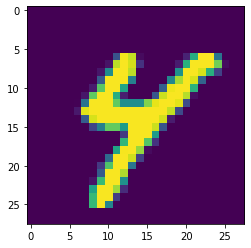

In [10]:
X_train, Y_train, X_test, Y_test = load_data()

print("Shape of X_train: " + str(X_train.shape))
print("Shape of Y_train: " + str(Y_train.shape))
print("Shape of X_test: " + str(X_test.shape))
print("Shape of Y_test: " + str(Y_test.shape))

show_sample(X_train, Y_train, 105)

Epoch: 10, cost: 0.671882, accuracy: 0.832309
Epoch: 20, cost: 0.453573, accuracy: 0.871818
Epoch: 30, cost: 0.389378, accuracy: 0.889145
Epoch: 40, cost: 0.357197, accuracy: 0.899400
Epoch: 50, cost: 0.337136, accuracy: 0.905527
Epoch: 60, cost: 0.323041, accuracy: 0.910309
Epoch: 70, cost: 0.312484, accuracy: 0.913364
Epoch: 80, cost: 0.304178, accuracy: 0.916236
Epoch: 90, cost: 0.297365, accuracy: 0.918382
Epoch: 100, cost: 0.291604, accuracy: 0.919945
Final result: cost: 0.291604, accuracy: 0.919945
Parameters have been trained!


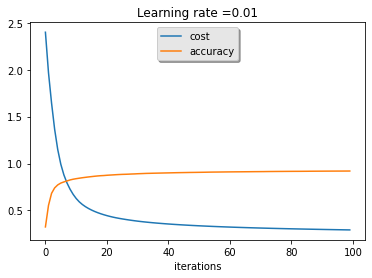

In [11]:
w1, b1 = model(X_train, Y_train, X_test, Y_test)

In [12]:
prediction = predict(X_test, w1, b1)
current_prediction = np.argmax(prediction, axis = 1)
correct_prediction = np.argmax(Y_test, axis = 1)
accuracy = np.mean(current_prediction == correct_prediction)
print("Accuracy on test set: %f" % (accuracy))


Accuracy on test set: 0.919700


In [13]:
print("Actual digits:   ", np.argmax(Y_test[0:10], axis = 1))
print("Predicted digits:", np.argmax(prediction[0:10], axis = 1))

Actual digits:    [7 2 1 0 4 1 4 9 5 9]
Predicted digits: [7 2 1 0 4 1 4 9 6 9]


Actual image of digits:


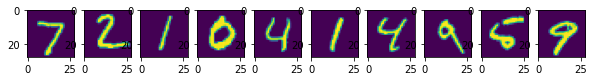

In [14]:
print("Actual image of digits:")
fig, a = plt.subplots(1, 10, figsize=(10, 2))
for i in range(10):
  a[i].imshow(np.reshape(X_test[i], (28,28)))
